In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
df=pd.read_csv('E:\\datascience\\datase11\\Edatasciencedatase11.csv')


#changind the dafault values to view all colunms
pd.options.display.max_columns=24
df.head()

,SessionStart,CustomerID,FullName,Gender,Age,CreditScore,MonthlyIncome,Country,State,City,Category,Product,Cost,Price,Quantity,CampaignSchema,CartAdditionTime,OrderConfirmation,OrderConfirmationTime,PaymentMethod,SessionEnd,OrderReturn,ReturnReason
0,2019-01-01 02:42:00,1001,Brittany Franklin,Male,57,780,7591,China,Guangdong,Dongguan,electronics,table fan,30,50,4,Instagram-ads,2019-01-01 02:49:00,True,2019-01-01 03:02:00,Cash On Delivery,2019-01-01 02:53:00,False,NaN
1,2019-01-02 20:35:00,1002,Scott Stewart,Female,69,746,3912,China,Shandong,Yantai,fashion,dress,50,80,6,Google-ads,2019-01-02 20:50:00,True,2019-01-02 20:58:00,Debit Card,2019-01-02 20:54:00,False,NaN
2,2019-01-04 03:11:00,1003,Elizabeth Fowler,Female,21,772,7460,UK,England,Birmingham,toys,plush toy,12,20,2,Facebook-ads,2019-01-04 03:30:00,True,2019-01-04 03:40:00,Cash On Delivery,2019-01-04 03:35:00,False,NaN
3,2019-01-05 09:01:00,1004,Julian Wall,Female,67,631,4765,UK,England,Birmingham,toys,plush toy,12,20,2,Twitter-ads,2019-01-05 09:17:00,True,2019-01-05 09:26:00,Cash On Delivery,2019-01-05 09:20:00,False,NaN
4,2019-01-05 13:35:00,1005,James Simmons,Male,57,630,3268,China,Shandong,Yantai,fashion,shoes,60,100,6,Billboard-QR code,2019-01-05 13:40:00,True,2019-01-05 13:52:00,Debit Card,2019-01-05 13:42:00,False,NaN


SessionStart: The timestamp indicating when a customer’s shopping session began.

CustomerID: A unique identifier for each customer involved in the transaction.

FullName: The full name of the customer.

Gender: The customer's gender.

Age: The age of the customer.

CreditScore: The customer's credit score, indicating their financial trustworthiness.

MonthlyIncome: The customer’s monthly income.

Country: The country where the customer is located.

State: The state or region within the customer's country.

City: The specific city where the customer resides.

Category: The category of the product purchased.

Product: The name or type of product purchased.

Cost: The cost price of the product to the seller.

Price: The selling price of the product for the customer.

Quantity: The number of units of the product purchased by the customer.

CampaignSchema: The source through which the customer was attracted to make the purchase.

CartAdditionTime: The timestamp indicating when the product was added to the cart.

OrderConfirmation: A Boolean value indicating whether the order was confirmed by the customer.

OrderConfirmationTime: The timestamp showing when the customer confirmed the order.

PaymentMethod: The method used for payment.

SessionEnd: The timestamp marking the end of the customer’s shopping session.

OrderReturn: A Boolean value indicating whether the order was returned by the customer.

ReturnReason: The reason for returning the order.

In [3]:
df.shape

(2000, 23)

In [4]:
#Checking the datatypes of all colunms
df.dtypes

SessionStart             object
CustomerID                int64
FullName                 object
Gender                   object
Age                       int64
CreditScore               int64
MonthlyIncome             int64
Country                  object
State                    object
City                     object
Category                 object
Product                  object
Cost                      int64
Price                     int64
Quantity                  int64
CampaignSchema           object
CartAdditionTime         object
OrderConfirmation          bool
OrderConfirmationTime    object
PaymentMethod            object
SessionEnd               object
OrderReturn              object
ReturnReason             object
dtype: object

In [5]:
#na values or missing values
df.isna().sum()

SessionStart                0
CustomerID                  0
FullName                    0
Gender                      0
Age                         0
CreditScore                 0
MonthlyIncome               0
Country                     0
State                       0
City                        0
Category                    0
Product                     0
Cost                        0
Price                       0
Quantity                    0
CampaignSchema              0
CartAdditionTime            0
OrderConfirmation           0
OrderConfirmationTime     300
PaymentMethod             300
SessionEnd                  0
OrderReturn               300
ReturnReason             1764
dtype: int64

In [6]:
#number of missing cells
df.isna().sum().sum()


2664

In [7]:
#percentage of missing cells
round(df.isna().sum().sum() / df.size * 100, 1)

5.8

In [8]:
#colunms havinf null values 
df[['ReturnReason','OrderReturn','PaymentMethod','OrderConfirmationTime']]

,ReturnReason,OrderReturn,PaymentMethod,OrderConfirmationTime
0,NaN,False,Cash On Delivery,2019-01-01 03:02:00
1,NaN,False,Debit Card,2019-01-02 20:58:00
2,NaN,False,Cash On Delivery,2019-01-04 03:40:00
3,NaN,False,Cash On Delivery,2019-01-05 09:26:00
4,NaN,False,Debit Card,2019-01-05 13:52:00
...,...,...,...,...
1995,NaN,False,Credit Card,2023-12-24 07:07:00
1996,NaN,False,Debit Card,2023-12-25 17:18:00
1997,NaN,False,Debit Card,2023-12-28 05:41:00
1998,NaN,NaN,NaN,NaN


In [9]:
#drop colunm returnReason sice it mostly contains null values
df.drop(['ReturnReason'],axis=1,inplace=True)

In [10]:
#drop the rows which have nan values
df.dropna(inplace=True)

In [11]:
#adding a nwe colunm which gives the total price
df['TotalPrice']=df['Price']*df['Quantity']

In [12]:
#selecting first 5 rows to viwe using iloc
df.iloc[:5,:]

,SessionStart,CustomerID,FullName,Gender,Age,CreditScore,MonthlyIncome,Country,State,City,Category,Product,Cost,Price,Quantity,CampaignSchema,CartAdditionTime,OrderConfirmation,OrderConfirmationTime,PaymentMethod,SessionEnd,OrderReturn,TotalPrice
0,2019-01-01 02:42:00,1001,Brittany Franklin,Male,57,780,7591,China,Guangdong,Dongguan,electronics,table fan,30,50,4,Instagram-ads,2019-01-01 02:49:00,True,2019-01-01 03:02:00,Cash On Delivery,2019-01-01 02:53:00,False,200
1,2019-01-02 20:35:00,1002,Scott Stewart,Female,69,746,3912,China,Shandong,Yantai,fashion,dress,50,80,6,Google-ads,2019-01-02 20:50:00,True,2019-01-02 20:58:00,Debit Card,2019-01-02 20:54:00,False,480
2,2019-01-04 03:11:00,1003,Elizabeth Fowler,Female,21,772,7460,UK,England,Birmingham,toys,plush toy,12,20,2,Facebook-ads,2019-01-04 03:30:00,True,2019-01-04 03:40:00,Cash On Delivery,2019-01-04 03:35:00,False,40
3,2019-01-05 09:01:00,1004,Julian Wall,Female,67,631,4765,UK,England,Birmingham,toys,plush toy,12,20,2,Twitter-ads,2019-01-05 09:17:00,True,2019-01-05 09:26:00,Cash On Delivery,2019-01-05 09:20:00,False,40
4,2019-01-05 13:35:00,1005,James Simmons,Male,57,630,3268,China,Shandong,Yantai,fashion,shoes,60,100,6,Billboard-QR code,2019-01-05 13:40:00,True,2019-01-05 13:52:00,Debit Card,2019-01-05 13:42:00,False,600


In [13]:
#summary of the data
df.describe()

,CustomerID,Age,CreditScore,MonthlyIncome,Cost,Price,Quantity,TotalPrice
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,1614.432353,44.605882,690.251765,5606.441176,133.160588,206.985882,3.549412,755.072353
std,351.946170,16.394165,51.068225,1448.135731,257.840154,388.213990,1.690755,1596.435557
min,1001.000000,18.000000,600.000000,3001.000000,5.000000,8.000000,1.000000,8.000000
25%,1313.750000,31.000000,645.000000,4428.250000,15.000000,25.000000,2.000000,75.000000
50%,1619.500000,44.000000,692.000000,5689.000000,30.000000,50.000000,4.000000,150.000000
75%,1922.250000,59.000000,733.000000,6871.000000,60.000000,100.000000,5.000000,400.000000
max,2200.000000,72.000000,780.000000,7999.000000,1000.000000,1500.000000,6.000000,9000.000000


**CustomerID:**

Count: 1700

The Customer IDs range from 1001 to 2200.

**Age:**

Count: 1700

The ages of customers range from 18 to 72, with an average age of 44.

The distribution indicates that 50% of the customers are aged 44 or below, with the 75th percentile at 59 years.

**Credit Score:**

Count: 1700

Credit scores range from 600 to 780, with a mean score of 690.25.

Half of the customers have credit scores of 692 or lower.

**Monthly Income:**

Count: 1700

Monthly income ranges from 3,001 to 7,999 units, with an average of 5,606.44.

The distribution of income shows a standard deviation of 1,448.14, indicating significant variability in customers’ earnings.

**Cost:**

Count: 1700

Product costs range from 5 to 1,000 units, with a mean cost of 133.16.

The standard deviation of 257.84 highlights the variation in product costs.

**Price:**

Count: 1700

Prices range from 8 to 1,500 units, with an average price of 206.99.

The 50th percentile (median) price is 50 units, while the 75th percentile is 100 units.

**Quantity:**

Count: 1700

Customers purchase between 1 and 6 items per transaction, with an average quantity of 3.55.

The 50th percentile is 4 items, while most purchases fall between 2 and 5 items.

**Total Price:**

Count: 1700

The total price of orders ranges from 8 to 9,000 units, with an average of 755.07.

The wide range of values and a standard deviation of 1,596.44 suggest a substantial variation in the total spend per customer.

In [14]:
#all columns
df.columns

Index(['SessionStart', 'CustomerID', 'FullName', 'Gender', 'Age',
       'CreditScore', 'MonthlyIncome', 'Country', 'State', 'City', 'Category',
       'Product', 'Cost', 'Price', 'Quantity', 'CampaignSchema ',
       'CartAdditionTime', 'OrderConfirmation', 'OrderConfirmationTime',
       'PaymentMethod', 'SessionEnd', 'OrderReturn', 'TotalPrice'],
      dtype='object')

In [15]:
#Correcting error in column name
df.rename(columns={'CampaignSchema ':'CampaignSchema'},inplace=True)

In [16]:
#unique values in category column
df['Category'].unique()

array(['electronics', 'fashion', 'toys', 'home appliances', 'books'],
      dtype=object)

In [17]:
#unique values in PaymentMethods
df['PaymentMethod'].unique()

array(['Cash On Delivery', 'Debit Card', 'Credit Card', 'Paypal'],
      dtype=object)

In [18]:
#uniqe values in gender column
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [19]:
#Campaign schemas included
df['CampaignSchema'].unique()

array(['Instagram-ads', 'Google-ads', 'Facebook-ads', 'Twitter-ads',
       'Billboard-QR code', 'E-mails'], dtype=object)

In [20]:
#countries
df['Country'].unique()

array(['China', 'UK', 'India', 'Spain', 'USA', 'Japan', 'Australia',
       'Italy', 'Canada'], dtype=object)

In [21]:
#states
df['State'].unique()

array(['Guangdong', 'Shandong', 'England', 'Maharashtra', 'Scotland',
       'Catalonia', 'California', 'Kanagawa', 'New South Wales',
       'Lombardy', 'Texas', 'Lazio', 'Ontario', 'Andalusia', 'Tokyo',
       'Quebec', 'Uttar Pradesh', 'Victoria'], dtype=object)

In [22]:
#cities
df['City'].unique()

array(['Dongguan', 'Yantai', 'Birmingham', 'Nagpur', 'Edinburgh',
       'Mumbai', 'Barcelona', 'San Jose', 'Sagamihara', 'Wollongong',
       'Pune', 'Brescia', 'San Antonio', 'Frosinone', 'Dallas',
       'Shenzhen', 'Kawasaki', 'San Diego', 'Mississauga', 'Toronto',
       'Granada', 'Yokohama', 'Laval', 'Seville', 'Tarragona', 'Kanpur',
       'Qingdao', 'Newcastle', 'Montreal', 'Latina', 'Jinan', 'Milan',
       'Ballarat', 'Tokyo', 'Bergamo', 'Los Angeles', 'Glasgow',
       'Guangzhou', 'Aberdeen', 'Geelong', 'Sydney', 'Ottawa', 'Rome',
       'Girona', 'Houston', 'Quebec City', 'Lucknow', 'Malaga',
       'Manchester', 'London', 'Ghaziabad', 'Melbourne'], dtype=object)

In [23]:
#unique no of costumers
len(df['CustomerID'].unique())

1103

In [24]:
#setting colunms to datetime format
df['SessionStart']=pd.to_datetime(df['SessionStart'])

(df['SessionStart'])
df['SessionEnd']=pd.to_datetime(df['SessionEnd'])
df['OrderConfirmationTime']=pd.to_datetime(df['OrderConfirmationTime'])
df['CartAdditionTime']=pd.to_datetime(df['CartAdditionTime'])
df.dtypes

SessionStart             datetime64[ns]
CustomerID                        int64
FullName                         object
Gender                           object
Age                               int64
CreditScore                       int64
MonthlyIncome                     int64
Country                          object
State                            object
City                             object
Category                         object
Product                          object
Cost                              int64
Price                             int64
Quantity                          int64
CampaignSchema                   object
CartAdditionTime         datetime64[ns]
OrderConfirmation                  bool
OrderConfirmationTime    datetime64[ns]
PaymentMethod                    object
SessionEnd               datetime64[ns]
OrderReturn                      object
TotalPrice                        int64
dtype: object

In [25]:
#looking into the values present in each columns
for i in df.columns:
    print(i)
    print(df[i].value_counts())

SessionStart
2019-01-01 02:42:00    1
2022-05-30 00:37:00    1
2022-05-28 08:36:00    1
2022-05-26 15:18:00    1
2022-05-25 20:42:00    1
                      ..
2020-09-11 15:55:00    1
2020-09-11 09:09:00    1
2020-09-10 10:48:00    1
2020-09-10 04:17:00    1
2023-12-31 08:01:00    1
Name: SessionStart, Length: 1700, dtype: int64
CustomerID
1993    4
1764    4
1594    4
1952    4
1464    4
       ..
1562    1
1563    1
1564    1
1567    1
1253    1
Name: CustomerID, Length: 1103, dtype: int64
FullName
Crystal Mitchell     4
Phillip Vazquez      4
Keith Sanchez        4
Katrina Edwards      4
Bonnie Fisher        4
                    ..
Elizabeth Hardy      1
Gloria Moore         1
Joshua Vargas        1
Krystal Burton       1
Michelle Friedman    1
Name: FullName, Length: 1103, dtype: int64
Gender
Female    879
Male      821
Name: Gender, dtype: int64
Age
69    50
66    49
21    47
36    47
33    45
25    44
68    44
22    42
19    40
37    40
44    38
56    37
48    37
41    36
35

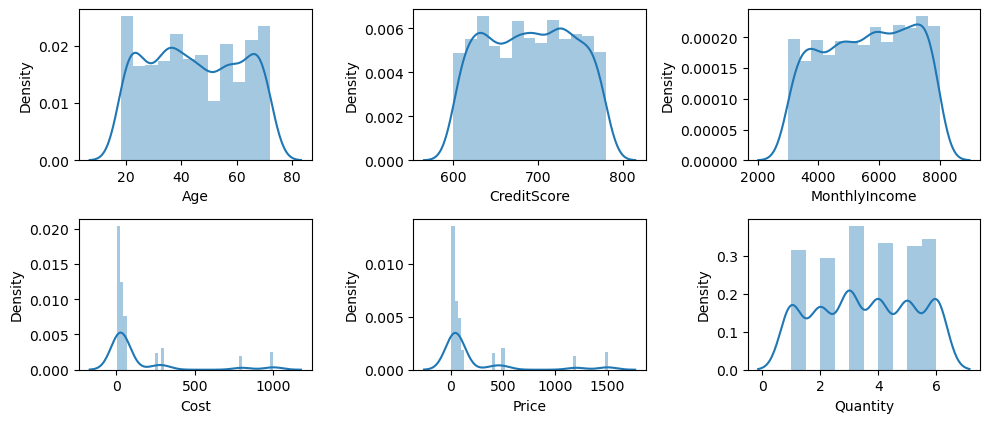

In [26]:
corlt=['Age','CreditScore','MonthlyIncome','Cost','Price','Quantity']


plt.figure(figsize=(10,6))
for i in range(0, len(corlt)):
    plt.subplot(3, 3, i+1)
    sns.distplot(df[corlt[i]])
    plt.tight_layout()
plt.show()

**Age:** 

The age distribution shows an even spread across different age groups, with slight peaks around 20-30 and 60-70. This suggests that the customer base is well-distributed across ages, with significant engagement from both younger and older populations.

**Credit Score:**
 
The credit score distribution is relatively flat, ranging from 600 to 780. Most customers have credit scores in the middle range (around 690), indicating a solid financial profile for the majority of buyers.

**Monthly Income:**

The monthly income of customers shows a uniform distribution between $4,000 and $8,000, peaking near the higher end ($7,000-$8,000). This suggests that most customers have a moderate to high income, with few earning below $4,000.

**Cost:**

Most of the purchases involve lower cost items, as indicated by the sharp peak near zero. However, there are a few spikes further out, suggesting occasional high-cost purchases.

**Price:**

Similar to the cost distribution, the majority of products are priced low, with a small number of more expensive items.

**Quantity:**

The quantity purchased per transaction is fairly evenly distributed between 1 and 6 items, with some peaks, indicating that customers tend to purchase multiple items in a single session.

In [27]:
#correlation
corlt=df[['Age','CreditScore','MonthlyIncome','Cost','Price','Quantity']].corr()
corlt

,Age,CreditScore,MonthlyIncome,Cost,Price,Quantity
Age,1.000000,-0.039935,-0.005674,-0.025437,-0.024643,0.034317
CreditScore,-0.039935,1.000000,0.002193,0.002409,0.000719,0.036884
MonthlyIncome,-0.005674,0.002193,1.000000,0.025360,0.025986,-0.020065
Cost,-0.025437,0.002409,0.025360,1.000000,0.999522,0.030000
Price,-0.024643,0.000719,0.025986,0.999522,1.000000,0.031089
Quantity,0.034317,0.036884,-0.020065,0.030000,0.031089,1.000000


<Axes: >

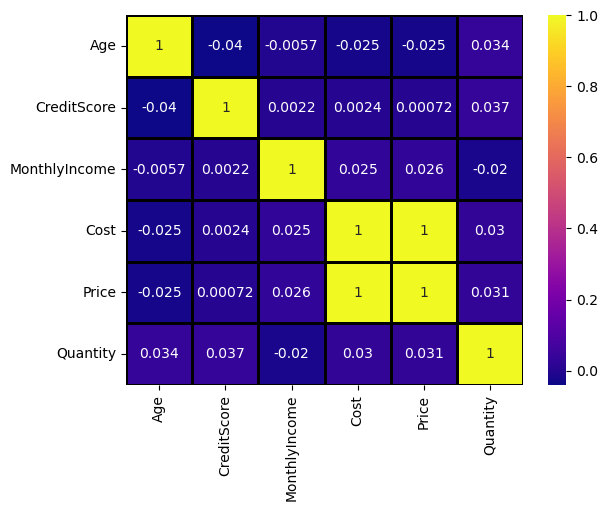

In [28]:
sns.heatmap(corlt,annot=True,cmap='plasma',linecolor='black',linewidths=1)


**Age:**

Weak negative correlations with most variables:

CreditScore: -0.04 (nearly negligible)

MonthlyIncome: -0.006

Cost: -0.025

Price: -0.025

A slightly positive correlation with Quantity: 0.034

**CreditScore:**

Virtually no correlation with other variables:

MonthlyIncome: 0.002 (no relationship)

Cost: 0.002 (negligible)

Price: 0.001 (negligible)

Quantity: 0.037 (slight positive relationship)

**MonthlyIncome:**

Weak positive correlations with Cost (0.025) and Price (0.026), indicating a slight relationship between income and product cost/price.

A slightly negative relationship with Quantity (-0.020).

**Cost and Price:**

Cost and Price show a near-perfect positive correlation (0.9995), as expected, since cost and price tend to move in tandem.

Both Cost and Price have small positive correlations with Quantity (0.030 and 0.031, respectively).

**Quantity:**

Slight positive correlations with Cost (0.030) and Price (0.031), indicating a minor relationship between the number of products purchased and their cost/price.

Other variables, such as Age and CreditScore, show weak correlations with Quantity (0.034 and 0.037, respectively).


In [29]:
#shape of data after cleaning
df.shape

(1700, 23)

In [30]:
#tital revenue generated
total_revenue=df['Price']*df['Quantity']
total_revenue.sum()

1283623

In [31]:
#number of males
male=df['Gender']=='Male'
male.sum()


821

In [32]:
#numbe of females
female=df['Gender']=='Female'
female.sum()

879

**The dataset comprises 2,000 rows and 23 columns, capturing details of customers and products.**

**Payment Methods:**

Customers used the following payment methods: Cash On Delivery, Debit Card, Credit Card, and Paypal.

**Marketing Campaigns:**

Products were purchased through various campaigns, including Instagram-ads, Google-ads, Facebook-ads, Twitter-ads, Billboard-QR codes, and E-mails.

**Geographical Distribution:**

Customers are distributed across several countries, with the majority from China, UK, India, Spain, USA, Japan, Australia, Italy, and Canada.

**Customer Uniqueness:**

Although 1,700 rows of customer data are present, only 1,103 rows represent unique customers, indicating some duplication or repeat purchases.

**Revenue Generation:**

The total revenue generated from sales is 1,283,623 units (currency unspecified).

**Customer Gender Distribution:**

The customer base is fairly balanced, with 821 male customers and 879 female customers.

**Missing Data:**

The columns ‘PaymentMethod’, ‘OrderReturn’, and ‘OrderConformationTime’ each have 300 missing values.

The ‘ReturnReason’ column has 1,764 missing values.

A total of 2,664 missing values were identified, accounting for approximately 5.8% of the dataset.

We opted to drop the ‘ReturnReason’ column due to the high percentage of missing data, and subsequently removed 300 rows containing NaN values from other 

columns, ensuring the dataset's integrity.



Visualization

<Axes: xlabel='Gender', ylabel='count'>

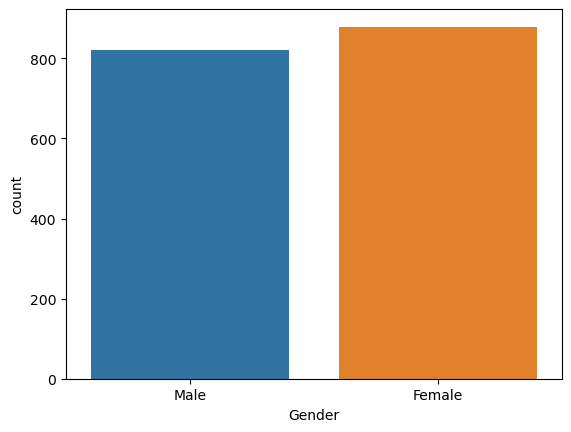

In [33]:
#count plot to obseve the number of male and female costumers
sns.countplot(x=df['Gender'])

Text(0.5, 1.0, 'Sales from different Campaigns')

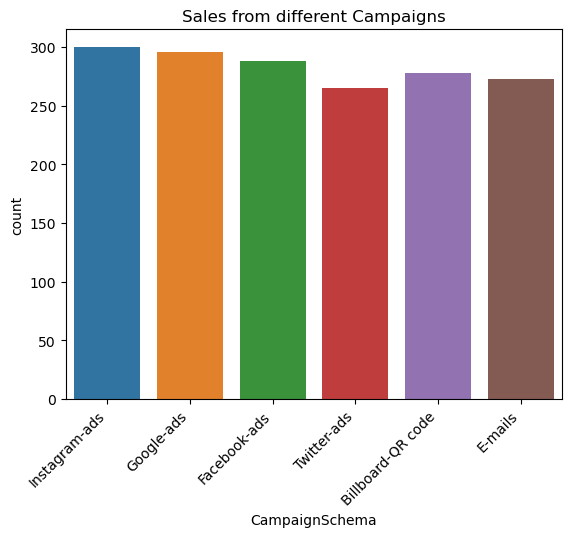

In [80]:
#count plot to understand the different add campaigns and the range of buyers from a specific campaign
sns.countplot(x=df.CampaignSchema)
plt.xticks(rotation=45, ha='right')
plt.title('Sales from different Campaigns')

Text(0.5, 1.0, 'Sales per category')

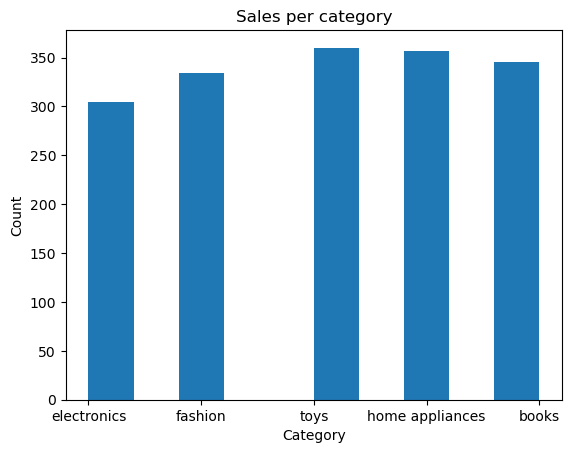

In [35]:
#historram to understand different product categories and their sales
plt.hist(df.Category)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Sales per category')

Text(0.5, 1.0, 'categoties and price')

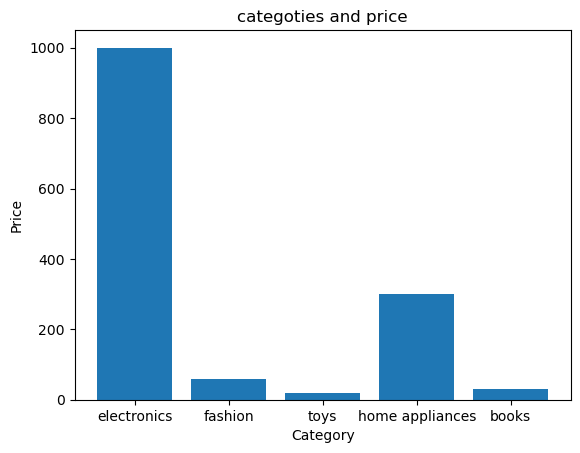

In [79]:
#bar plot to visualize the relation bw diff categoties and their price
plt.bar(df.Category,df.Cost)
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('categoties and price')

Text(0.5, 1.0, 'payment methods used by costumers')

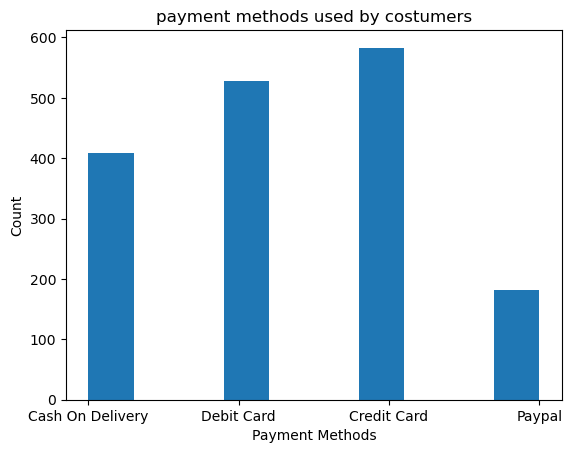

In [77]:
#histogram to understand diff payment methods used by costumers
plt.hist(df.PaymentMethod)
plt.xlabel('Payment Methods')
plt.ylabel('Count')
plt.title('payment methods used by costumers')

Text(0.5, 1.0, 'income and purchased price')

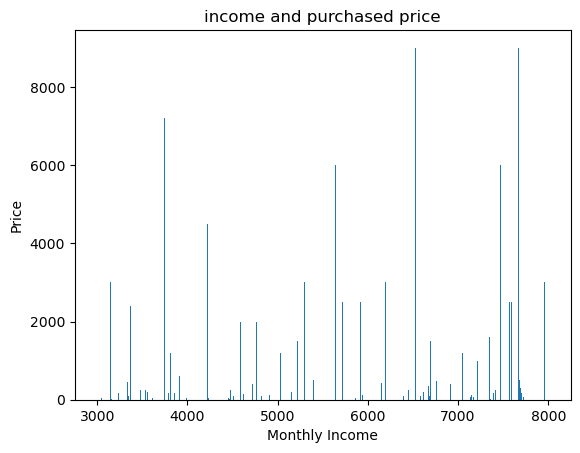

In [78]:
#relation bw monthly income and purchased price
plt.bar(df.MonthlyIncome,df.TotalPrice)
plt.xlabel('Monthly Income')
plt.ylabel('Price')
plt.title('income and purchased price')

The scatter plot reveals that higher-priced items are purchased across all income levels, with no clear correlation between income and price.
 
This suggests that customers with varying income levels are equally likely to buy high-ticket items. 

There are, however, notable spikes in purchases between $3,000 to $8,000 monthly income, indicating sporadic high-value transactions across all income 

brackets.

**Key Insights from Visualizations**

**Gender Distribution:**

The count plot reveals that the number of female customers is higher than that of male customers.

**Sales by Marketing Campaign:**

From the plot, it’s evident that Instagram-ads generated the highest number of sales, followed by:

Google-ads

Facebook-ads

Billboard-QR codes

E-mails

The fewest sales were generated from Twitter-ads.

**Sales by Product Category:**

The plot shows that most sales were made in the Toys category, followed by:

Home appliances

Books

Fashion


Electronics had the fewest sales overall.

**Product Pricing by Category:**

The graph indicates that Electronics products are priced the highest, followed by:

Home appliances

Fashion

Books

Toys have the lowest average price.

**Payment Method Preferences:**

The plot clearly shows that most purchases were made using Credit Cards (close to 600 transactions), followed by:

Debit Cards

Cash on Delivery

Paypal was the least preferred payment method.


In [39]:
#filtering peoples who used cash on delivery as payment method
cod=df[df['PaymentMethod']=='Cash On Delivery']
cod.head()

,SessionStart,CustomerID,FullName,Gender,Age,CreditScore,MonthlyIncome,Country,State,City,Category,Product,Cost,Price,Quantity,CampaignSchema,CartAdditionTime,OrderConfirmation,OrderConfirmationTime,PaymentMethod,SessionEnd,OrderReturn,TotalPrice
0,2019-01-01 02:42:00,1001,Brittany Franklin,Male,57,780,7591,China,Guangdong,Dongguan,electronics,table fan,30,50,4,Instagram-ads,2019-01-01 02:49:00,True,2019-01-01 03:02:00,Cash On Delivery,2019-01-01 02:53:00,False,200
2,2019-01-04 03:11:00,1003,Elizabeth Fowler,Female,21,772,7460,UK,England,Birmingham,toys,plush toy,12,20,2,Facebook-ads,2019-01-04 03:30:00,True,2019-01-04 03:40:00,Cash On Delivery,2019-01-04 03:35:00,False,40
3,2019-01-05 09:01:00,1004,Julian Wall,Female,67,631,4765,UK,England,Birmingham,toys,plush toy,12,20,2,Twitter-ads,2019-01-05 09:17:00,True,2019-01-05 09:26:00,Cash On Delivery,2019-01-05 09:20:00,False,40
8,2019-01-09 16:29:00,1009,Justin Hardin,Male,59,609,3003,Spain,Catalonia,Barcelona,fashion,dress,50,80,1,Billboard-QR code,2019-01-09 16:47:00,True,2019-01-09 16:58:00,Cash On Delivery,2019-01-09 16:52:00,True,80
10,2019-01-13 15:41:00,1011,Zachary Roberts,Male,60,634,6753,USA,California,San Jose,fashion,dress,50,80,1,Billboard-QR code,2019-01-13 16:08:00,True,2019-01-13 16:16:00,Cash On Delivery,2019-01-13 16:12:00,True,80


In [40]:
#summary
cod.describe(include='all')

,SessionStart,CustomerID,FullName,Gender,Age,CreditScore,MonthlyIncome,Country,State,City,Category,Product,Cost,Price,Quantity,CampaignSchema,CartAdditionTime,OrderConfirmation,OrderConfirmationTime,PaymentMethod,SessionEnd,OrderReturn,TotalPrice
count,408,408.000000,408,408,408.000000,408.000000,408.000000,408,408,408,408,408,408.000000,408.000000,408.000000,408,408,408,408,408,408,408,408.000000
unique,408,NaN,361,2,NaN,NaN,NaN,9,18,52,5,20,NaN,NaN,NaN,6,408,1,408,1,408,2,NaN
top,2019-01-01 02:42:00,NaN,Sherry Garza,Female,NaN,NaN,NaN,Canada,Maharashtra,Kawasaki,home appliances,toaster,NaN,NaN,NaN,Twitter-ads,2019-01-01 02:49:00,True,2019-01-01 03:02:00,Cash On Delivery,2019-01-01 02:53:00,False,NaN
freq,1,NaN,3,214,NaN,NaN,NaN,56,30,15,93,28,NaN,NaN,NaN,78,1,408,1,408,1,356,NaN
first,2019-01-01 02:42:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 02:49:00,NaN,2019-01-01 03:02:00,NaN,2019-01-01 02:53:00,NaN,NaN
last,2023-12-22 00:26:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-22 00:38:00,NaN,2023-12-22 00:43:00,NaN,2023-12-22 00:42:00,NaN,NaN
mean,NaN,1620.526961,NaN,NaN,44.000000,687.742647,5785.080882,NaN,NaN,NaN,NaN,NaN,134.134804,207.825980,3.514706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,784.894608
std,NaN,361.613996,NaN,NaN,16.441393,51.826017,1479.390037,NaN,NaN,NaN,NaN,NaN,264.486660,397.953088,1.760829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1703.419631
min,NaN,1001.000000,NaN,NaN,18.000000,600.000000,3003.000000,NaN,NaN,NaN,NaN,NaN,5.000000,8.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000
25%,NaN,1291.500000,NaN,NaN,29.000000,642.000000,4672.750000,NaN,NaN,NaN,NaN,NaN,15.000000,25.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.000000


**Age:**

The ages of the customers range from 18 to 72, with an average age of 44.
50% of the customers are aged 44 or below (median age), while the 75th percentile is at 58.

**Credit Score:**

Credit scores range between 600 and 780, with a mean of 687.74.
Most customers have credit scores clustered around the median of 685.5.

**Monthly Income:**

Monthly incomes vary widely, from 3,003 to 7,998 (units unspecified), with a mean income of 5,785.08.
The income distribution shows a standard deviation of 1,479.39, indicating a substantial spread in earnings among the customers.

**Cost:**

The cost of products ranges from 5 to 1,000 units, with an average cost of 134.13.
The standard deviation of 264.49 indicates variability in the cost of products purchased.

**Price:**

Product prices range from 8 to 1,500 units, with a mean of 207.83.
The price data exhibits a large spread, as reflected by the standard deviation of 397.95.

**Quantity:**

The quantity of products purchased ranges from 1 to 6 per order, with an average purchase quantity of 3.51 items.
Most customers buy between 2 and 5 items in a single purchase, with a median of 4.

**Total Price:**

The total price of transactions ranges from 8 to 9,000 units, with an average total price of 784.89.
There is considerable variation in the total prices, with a standard deviation of 1,703.42 units.

In [41]:
#converting the campaignschema colunm into numerical values as a new colunm for further analysis and visualization
df['CampaignSchema_num']=df['CampaignSchema'].replace({'Instagram-ads':1,'Facebook-ads':2,'Twitter-ads':3,'Billboard-QR code':4,'Google-ads':5,'E-mails':6})
df.head()

,SessionStart,CustomerID,FullName,Gender,Age,CreditScore,MonthlyIncome,Country,State,City,Category,Product,Cost,Price,Quantity,CampaignSchema,CartAdditionTime,OrderConfirmation,OrderConfirmationTime,PaymentMethod,SessionEnd,OrderReturn,TotalPrice,CampaignSchema_num
0,2019-01-01 02:42:00,1001,Brittany Franklin,Male,57,780,7591,China,Guangdong,Dongguan,electronics,table fan,30,50,4,Instagram-ads,2019-01-01 02:49:00,True,2019-01-01 03:02:00,Cash On Delivery,2019-01-01 02:53:00,False,200,1
1,2019-01-02 20:35:00,1002,Scott Stewart,Female,69,746,3912,China,Shandong,Yantai,fashion,dress,50,80,6,Google-ads,2019-01-02 20:50:00,True,2019-01-02 20:58:00,Debit Card,2019-01-02 20:54:00,False,480,5
2,2019-01-04 03:11:00,1003,Elizabeth Fowler,Female,21,772,7460,UK,England,Birmingham,toys,plush toy,12,20,2,Facebook-ads,2019-01-04 03:30:00,True,2019-01-04 03:40:00,Cash On Delivery,2019-01-04 03:35:00,False,40,2
3,2019-01-05 09:01:00,1004,Julian Wall,Female,67,631,4765,UK,England,Birmingham,toys,plush toy,12,20,2,Twitter-ads,2019-01-05 09:17:00,True,2019-01-05 09:26:00,Cash On Delivery,2019-01-05 09:20:00,False,40,3
4,2019-01-05 13:35:00,1005,James Simmons,Male,57,630,3268,China,Shandong,Yantai,fashion,shoes,60,100,6,Billboard-QR code,2019-01-05 13:40:00,True,2019-01-05 13:52:00,Debit Card,2019-01-05 13:42:00,False,600,4


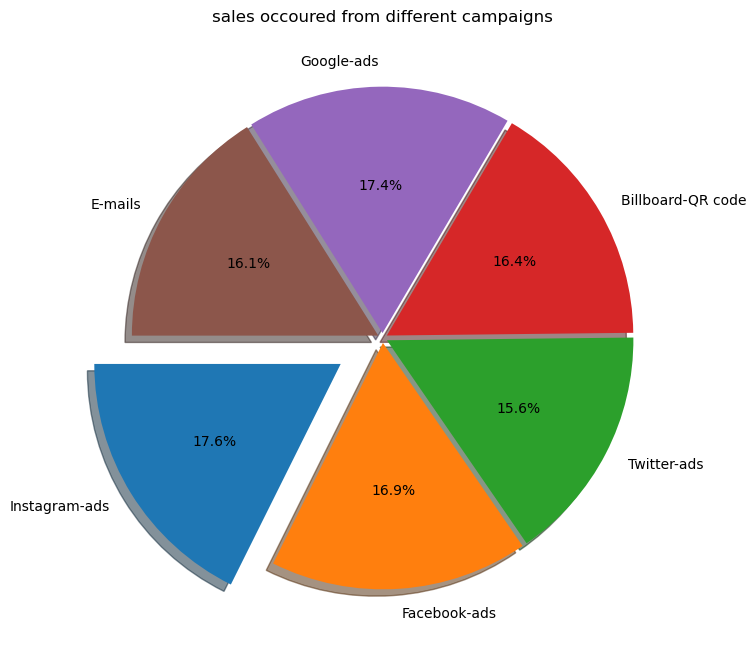

In [90]:
#pie plot to understand the sales occoured from different campaigns

data=df.groupby('CampaignSchema_num').groups
data
# Calculate the sizes of each group
sizes = [len(data[key]) for key in data]
labels = ['Instagram-ads','Facebook-ads','Twitter-ads','Billboard-QR code','Google-ads','E-mails']
expl=[0.2,0.02,0.02,0.02,0.02,0.02]

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes,labels=labels, autopct='%1.1f%%',explode=expl, startangle=180,shadow=True)
plt.title('sales occoured from different campaigns')
plt.show()

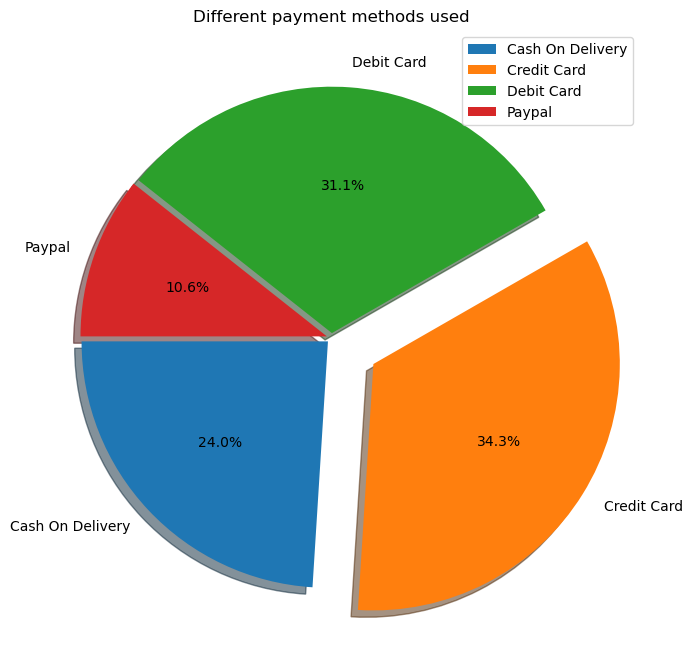

In [89]:
#pie plot to visualize the diff payment methods used


#grouping data
pymtd=df.groupby('PaymentMethod').groups
#Counting data under each group
size1=[len(pymtd[key]) for key in pymtd]

lbl=['Cash On Delivery','Credit Card','Debit Card','Paypal']
expld=[.02,.2,.02,.02]
plt.figure(figsize=(10, 8))
plt.pie(size1,labels=lbl,explode=expld, autopct='%1.1f%%', startangle=180,shadow=True)
plt.title('Different payment methods used')
plt.legend()

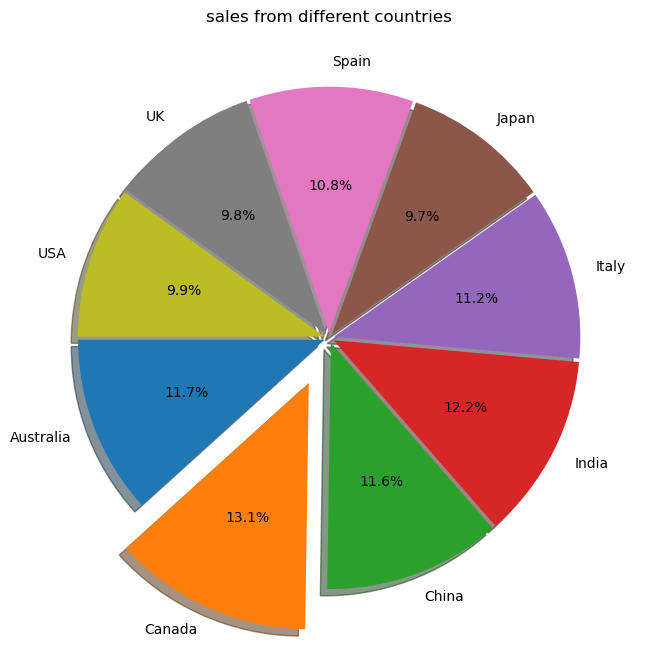

In [88]:
#pie plot showing the amound of total sales from diff countries

cntry=df.groupby(df.Country).groups
size2=[len(cntry[key]) for key in cntry]
lbl2=['Australia','Canada', 'China', 'India', 'Italy', 'Japan', 'Spain','UK', 'USA']
expl2=[.02,.2,.02,.02,.02,.02,.02,.02,.02]
plt.figure(figsize=(10,8))
plt.pie(size2,labels=lbl2,explode=expl2,autopct='%1.1f%%',startangle=180,shadow=True)
plt.title('sales from different countries')
plt.show()

Text(0.5, 1.0, 'Cales from canada')

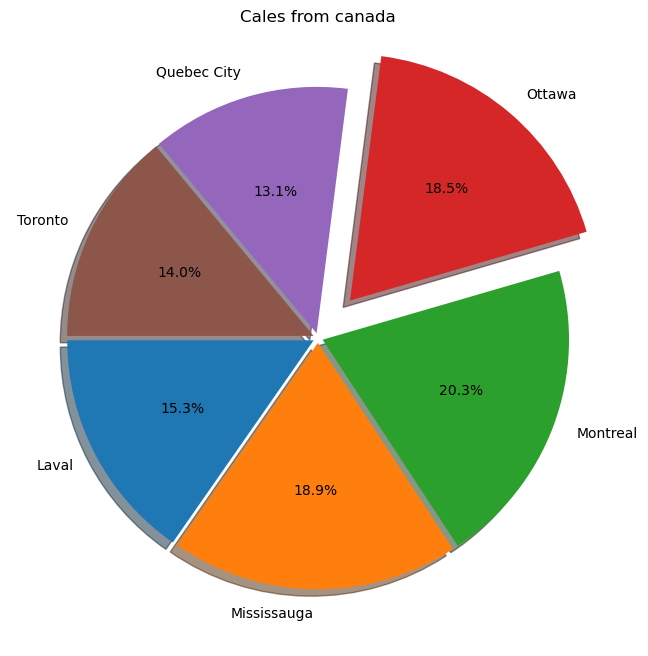

In [87]:
#pie plot showing the of total sale from canada
canada=df[df['Country']=='Canada']
city_can=canada.groupby(canada.City).groups
size=[len(city_can[key]) for key in city_can]
lbl=['Laval','Mississauga','Montreal','Ottawa','Quebec City','Toronto']
expl=[.02,.02,.02,.2,.02,.02]
plt.figure(figsize=(10,8))
plt.pie(size,labels=lbl,autopct='%1.1f%%',startangle=180,shadow=True,explode=expl)
plt.title('Cales from canada')

Sales Insights by Campaign, Payment Method, and Region

**Campaign Conversion Rates:**

Instagram ads have the highest conversion rate, accounting for 17.6% of total sales.
Google ads closely follow with 17.4%, while Twitter ads drive the fewest sales at 15.6%.

**Payment Method Preferences:**

34.3% of customers prefer using Credit Cards for payment, making it the most common payment method.
31.1% of transactions are completed via Debit Cards, while Cash on Delivery is chosen by 24% of customers.
Paypal is the least preferred method, used in only 10.6% of purchases.

**Geographical Distribution of Customers:**

Canada has the highest share of customers, contributing to 13.3% of the total customer base, out of 9 countries.
Japan has the smallest share, with 9.7% of customers.

**Product Categories:**

Home appliances and Toys are the leading product categories in terms of sales, while Electronics trail behind with the least number of sales.
In terms of pricing, Electronics are the most expensive category, followed by Home Appliances.

In [46]:
#order returned
retrn=df.groupby(df['OrderReturn']).groups
print(retrn)
orderReturn=[len(retrn[key]) for key in retrn]
orderReturn

{False: [0, 1, 2, 3, 4, 5, 7, 11, 12, 13, 16, 17, 18, 19, 20, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 38, 39, 40, 41, 44, 45, 46, 47, 49, 50, 53, 54, 55, 57, 58, 59, 60, 61, 62, 64, 65, 67, 68, 70, 71, 72, 73, 74, 75, 78, 79, 81, 82, 83, 84, 86, 87, 89, 92, 93, 94, 95, 100, 102, 103, 104, 106, 107, 108, 110, 111, 112, 113, 116, 117, 119, 120, 121, 122, 123, 124, 125, 127, 129, 130, 132, 135, 136, 137, 139, 140, 141, ...], True: [6, 8, 10, 14, 37, 42, 43, 51, 69, 76, 77, 80, 88, 91, 98, 101, 105, 114, 115, 118, 128, 131, 138, 168, 169, 180, 188, 189, 196, 206, 211, 217, 225, 242, 244, 247, 249, 255, 264, 268, 270, 281, 282, 297, 299, 305, 320, 321, 327, 329, 339, 359, 380, 382, 383, 389, 392, 397, 399, 406, 408, 425, 429, 435, 437, 448, 455, 461, 464, 467, 479, 484, 486, 505, 508, 536, 543, 556, 560, 586, 601, 610, 612, 621, 629, 647, 653, 657, 659, 666, 687, 691, 707, 708, 732, 739, 758, 765, 772, 783, ...]}


[1464, 236]

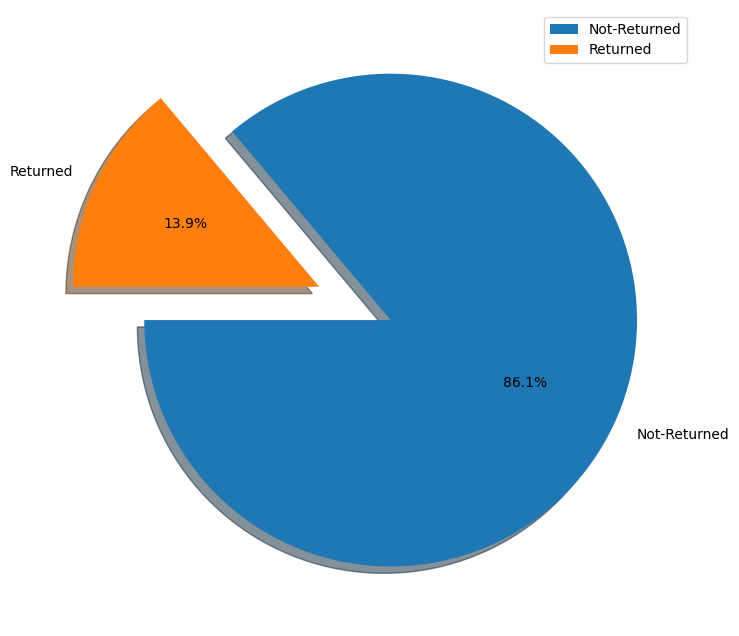

In [47]:
#pie plot showing the returned and non returned products

retrn=df.groupby('OrderReturn').groups
size3=[len(retrn[key]) for key in retrn]
lbl3=['Not-Returned','Returned']
expl3=[.02,.3]
plt.figure(figsize=(10,8))
plt.pie(size3,labels=lbl3,explode=expl3,autopct='%1.1f%%',startangle=180,shadow=True)
plt.legend()
plt.show()

Text(0, 0.5, 'Count')

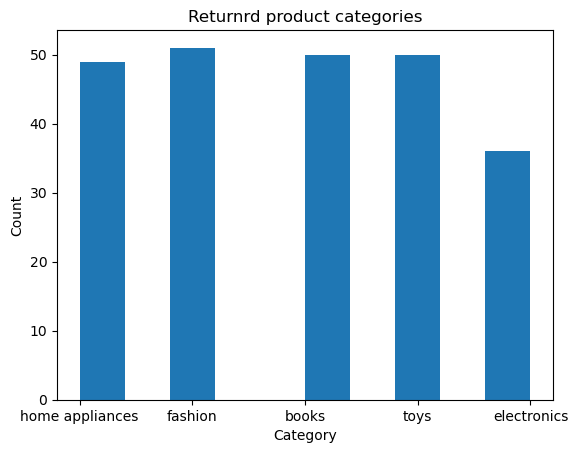

In [92]:
#plot to understand returnrd product categories
orderReturn_df=df[df['OrderReturn']]
plt.hist(orderReturn_df['Category'])
plt.title('Returnrd product categories')
plt.xlabel('Category')
plt.ylabel('Count')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Google-ads'),
  Text(1, 0, 'Billboard-QR code'),
  Text(2, 0, 'Twitter-ads'),
  Text(3, 0, 'E-mails'),
  Text(4, 0, 'Facebook-ads'),
  Text(5, 0, 'Instagram-ads')])

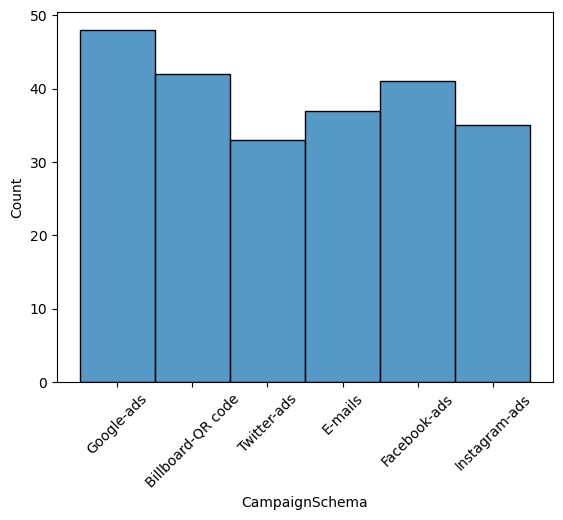

In [49]:
#plot to understand products brought through which campaign schema are returned most  
sns.histplot(orderReturn_df['CampaignSchema'])
plt.xticks(rotation=45)

Order Returns Insights

**Overall Return Rate:**

13.9% of the total orders were returned.

**Returns by Product Category:**

The ‘Fashion’ category experienced the highest return rate, making it the most returned category.
‘Electronics’ products had the fewest returns, making them the least likely to be returned.

**Returns by Marketing Campaign:**

Products purchased through Google ads had the highest return rate.
In contrast, the lowest return rate was observed in products purchased through Twitter ads.

Time data analysis

In [50]:
#time spend by costumers durig purchase
[df['SessionEnd']-df['SessionStart']]

[0      0 days 00:11:00
 1      0 days 00:19:00
 2      0 days 00:24:00
 3      0 days 00:19:00
 4      0 days 00:07:00
              ...      
 1994   0 days 00:15:00
 1995   0 days 00:15:00
 1996   0 days 00:34:00
 1997   0 days 00:31:00
 1999   0 days 00:27:00
 Length: 1700, dtype: timedelta64[ns]]

In [51]:
#how many customers end the session within 10 mins from session start?
min10=df[df['SessionEnd']-df['SessionStart']<=pd.Timedelta(minutes=10)]
len(min10['CustomerID'])

142

In [52]:
#how many customers end the session within 15 mins from session start?
min15=df[df['OrderConfirmationTime']-df['SessionStart']<=pd.Timedelta(minutes=15)]
len(min15['CustomerID'])

120

In [53]:
#number of costumers who spend more than 20 minutes
min20=df[df['SessionEnd']-df['SessionStart']>=pd.Timedelta(minutes=20)]
len(min20['CustomerID'])

941

Customer Session Duration Insights
Session Duration:
142 customers ended their session within 10 minutes.
120 customers ended their session within 15 minutes.
A significant number, 941 customers, spent more than 20 minutes purchasing products.

In [54]:
#sales in each month
monthly_sales=df.groupby(df['SessionStart'].dt.month).groups
[len(monthly_sales[key]) for key in monthly_sales]

[136, 132, 131, 138, 144, 147, 154, 157, 139, 138, 126, 158]

Text(0.5, 1.0, 'Monthly sales')

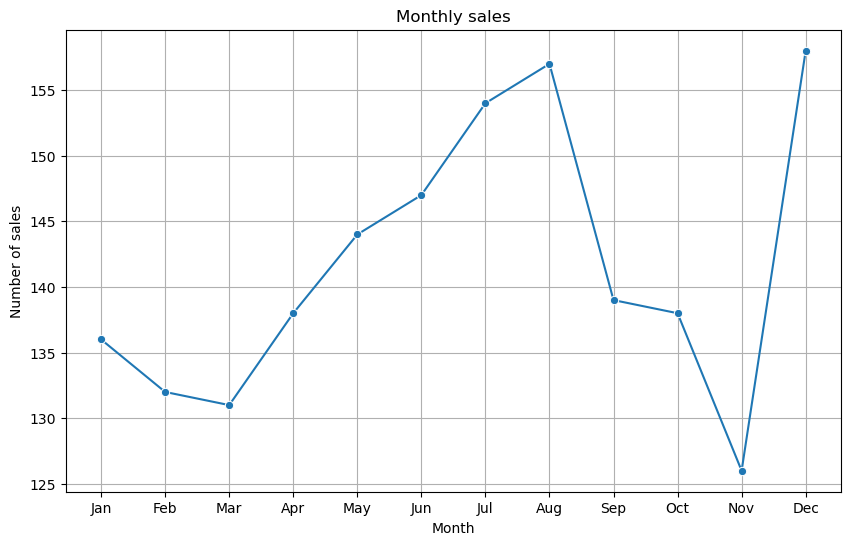

In [55]:
#bar plot to understand the sales in each month through all years
monthly_sales_each=[136, 132, 131, 138, 144, 147, 154, 157, 139, 138, 126, 158]
month=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_sales_df=pd.DataFrame({'month':month,'sales':monthly_sales_each})
monthly_sales_df

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales_df['month'],y=monthly_sales_df['sales'],marker='o')
plt.grid()
plt.xlabel('Month')
plt.ylabel('Number of sales')
plt.title('Monthly sales')

In [56]:

year_2019=df[df['OrderConfirmationTime'].dt.year==2019]
months_19=year_2019.groupby(year_2019['SessionStart'].dt.month).groups
year_2020=df[df['OrderConfirmationTime'].dt.year==2020]
months_20=year_2020.groupby(year_2020['SessionStart'].dt.month).groups
year_2021=df[df['OrderConfirmationTime'].dt.year==2021]
months_21=year_2021.groupby(year_2021['SessionStart'].dt.month).groups
year_2022=df[df['OrderConfirmationTime'].dt.year==2022]
months_22=year_2022.groupby(year_2022['SessionStart'].dt.month).groups
year_2023=df[df['OrderConfirmationTime'].dt.year==2023]
months_23=year_2023.groupby(year_2023['SessionStart'].dt.month).groups

sales_19=[len(months_19[key]) for key in months_19]
sales_20=[len(months_20[key]) for key in months_20]
sales_21=[len(months_21[key]) for key in months_21]
sales_22=[len(months_22[key]) for key in months_22]
sales_23=[len(months_23[key]) for key in months_23]


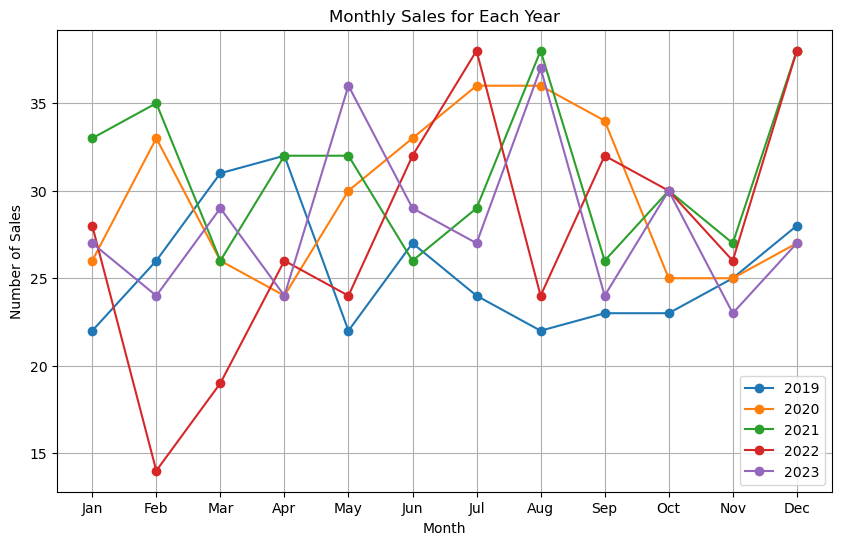

In [57]:
plt.figure(figsize=(10, 6))

plt.plot(month, sales_19, label='2019', marker='o')
plt.plot(month, sales_20, label='2020', marker='o')
plt.plot(month, sales_21, label='2021', marker='o')
plt.plot(month, sales_22, label='2022', marker='o')
plt.plot(month, sales_23, label='2023', marker='o')

# Add titles and labels
plt.title('Monthly Sales for Each Year')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(month)  # Ensure the x-axis shows months
plt.legend()
plt.grid()

# Show the plot
plt.show()

**Yearly Trends:**

The sales trend across different years reveals seasonal peaks and troughs. For example:

Sales tend to dip in February and March, increase sharply around June to August, and peak in December.

December shows the highest sales volume every year, likely due to holiday shopping.

The variation in trends across the years indicates fluctuating demand, but the general pattern of mid-year growth followed by a year-end spike is 

consistent.

**Highest Sales:**

2021 experienced the highest sales overall compared to other years.

Seasonality: This graph suggests that marketing and stock management should anticipate lower sales in early Q1 and focus more efforts in mid and late Q2 to 

Q4, particularly leading up to December.

In [58]:
#costumers who brought their product in the month of january
jan=df[df['SessionStart'].dt.month==1]
jan.head()

,SessionStart,CustomerID,FullName,Gender,Age,CreditScore,MonthlyIncome,Country,State,City,Category,Product,Cost,Price,Quantity,CampaignSchema,CartAdditionTime,OrderConfirmation,OrderConfirmationTime,PaymentMethod,SessionEnd,OrderReturn,TotalPrice,CampaignSchema_num
0,2019-01-01 02:42:00,1001,Brittany Franklin,Male,57,780,7591,China,Guangdong,Dongguan,electronics,table fan,30,50,4,Instagram-ads,2019-01-01 02:49:00,True,2019-01-01 03:02:00,Cash On Delivery,2019-01-01 02:53:00,False,200,1
1,2019-01-02 20:35:00,1002,Scott Stewart,Female,69,746,3912,China,Shandong,Yantai,fashion,dress,50,80,6,Google-ads,2019-01-02 20:50:00,True,2019-01-02 20:58:00,Debit Card,2019-01-02 20:54:00,False,480,5
2,2019-01-04 03:11:00,1003,Elizabeth Fowler,Female,21,772,7460,UK,England,Birmingham,toys,plush toy,12,20,2,Facebook-ads,2019-01-04 03:30:00,True,2019-01-04 03:40:00,Cash On Delivery,2019-01-04 03:35:00,False,40,2
3,2019-01-05 09:01:00,1004,Julian Wall,Female,67,631,4765,UK,England,Birmingham,toys,plush toy,12,20,2,Twitter-ads,2019-01-05 09:17:00,True,2019-01-05 09:26:00,Cash On Delivery,2019-01-05 09:20:00,False,40,3
4,2019-01-05 13:35:00,1005,James Simmons,Male,57,630,3268,China,Shandong,Yantai,fashion,shoes,60,100,6,Billboard-QR code,2019-01-05 13:40:00,True,2019-01-05 13:52:00,Debit Card,2019-01-05 13:42:00,False,600,4


In [59]:
#similarly in all months
feb=df[df['SessionStart'].dt.month==2]
mar=df[df['SessionStart'].dt.month==3]
apr=df[df['SessionStart'].dt.month==4]
may=df[df['SessionStart'].dt.month==5]
jun=df[df['SessionStart'].dt.month==6]
jul=df[df['SessionStart'].dt.month==7]
aug=df[df['SessionStart'].dt.month==8]
sep=df[df['SessionStart'].dt.month==9]
oct=df[df['SessionStart'].dt.month==10]
nov=df[df['SessionStart'].dt.month==11]
dec=df[df['SessionStart'].dt.month==12]

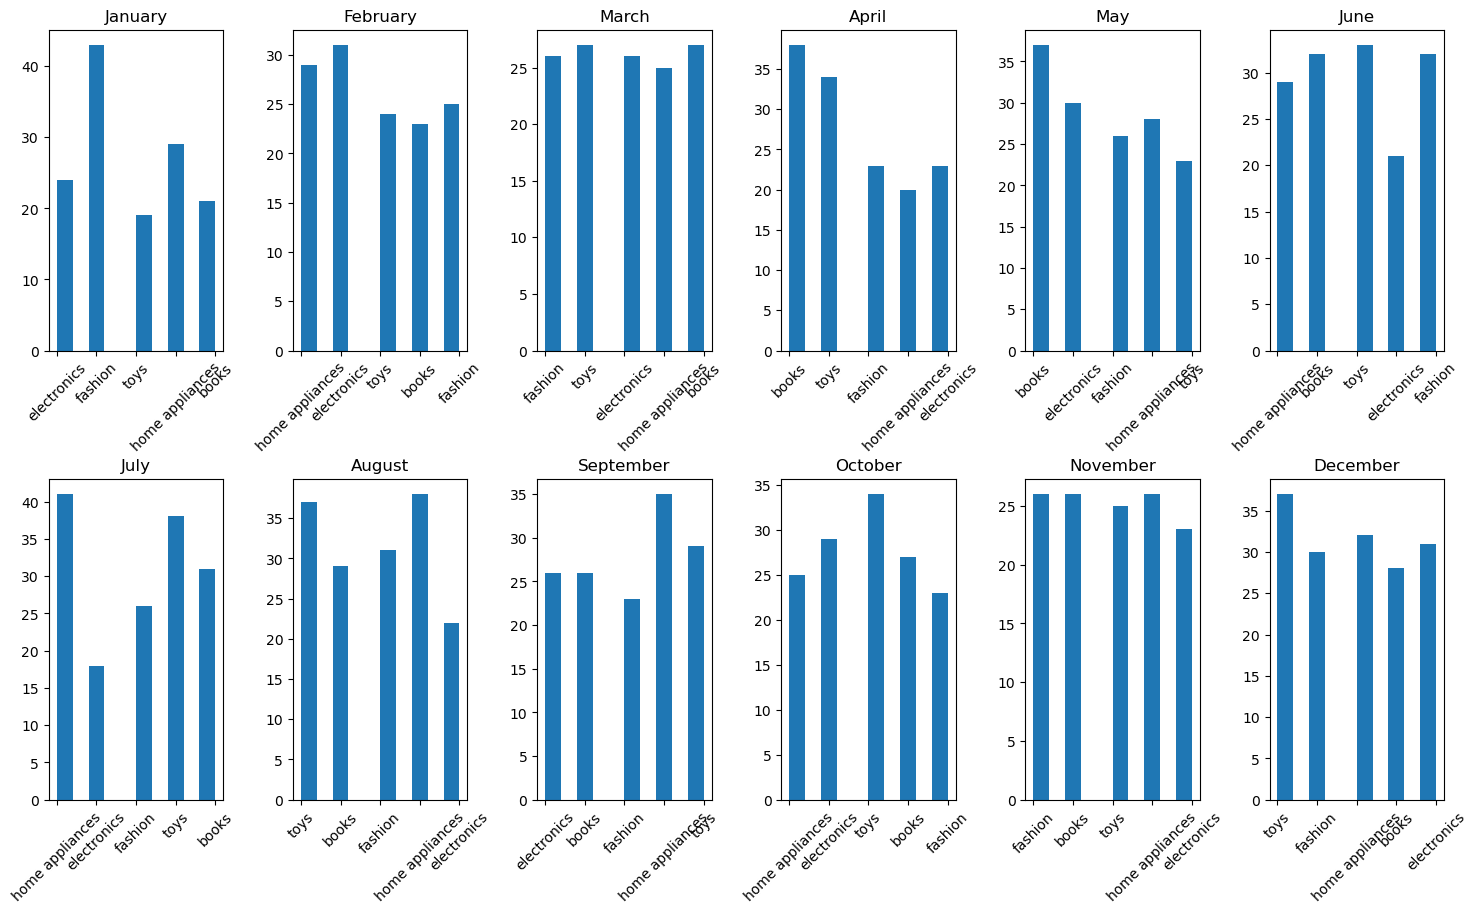

In [93]:
#ploting sales in each month to analyze diff catogories sold in each month
def graph(month):
    plt.hist(month.Category)

# Adjusting the figure size and layout
plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.4)


plt.subplot(2, 6, 1)
graph(jan)
plt.title('January')
plt.xticks(rotation=45)

plt.subplot(2, 6, 2)
graph(feb)
plt.title('February')
plt.xticks(rotation=45)

plt.subplot(2, 6, 3)
graph(mar)
plt.title('March')
plt.xticks(rotation=45)

plt.subplot(2, 6, 4)
graph(apr)
plt.title('April')
plt.xticks(rotation=45)

plt.subplot(2, 6, 5)
graph(may)
plt.title('May')
plt.xticks(rotation=45)

plt.subplot(2, 6, 6)
graph(jun)
plt.title('June')
plt.xticks(rotation=45)

plt.subplot(2, 6, 7)
graph(jul)
plt.title('July')
plt.xticks(rotation=45)

plt.subplot(2, 6, 8)
graph(aug)
plt.title('August')
plt.xticks(rotation=45)

plt.subplot(2, 6, 9)
graph(sep)
plt.title('September')
plt.xticks(rotation=45)

plt.subplot(2, 6, 10)
graph(oct)
plt.title('October')
plt.xticks(rotation=45)

plt.subplot(2, 6, 11)
graph(nov)
plt.title('November')
plt.xticks(rotation=45)

plt.subplot(2, 6, 12)
graph(dec)
plt.title('December')
plt.xticks(rotation=45)

plt.show()


In [61]:
#ploting sales on ech days of the week
week=df.groupby([df['OrderConfirmationTime'].dt.weekday]).groups
[len(week[key]) for key in week]

[198, 270, 250, 264, 264, 228, 226]

Text(0, 0.5, 'Sales')

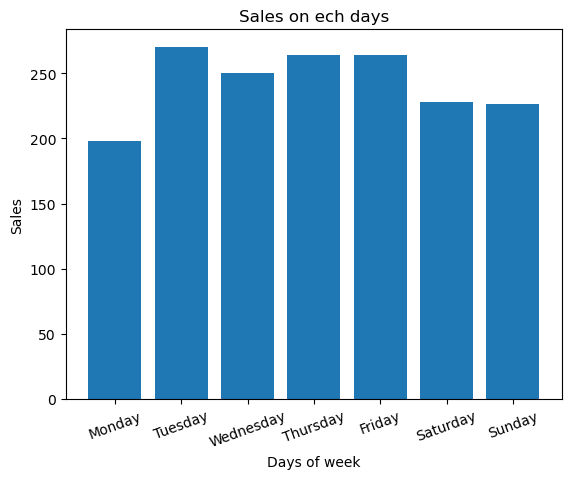

In [94]:
weekly_sale=[198, 270, 250, 264, 264, 228, 226]
weeks=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

weekly_sale_df=pd.DataFrame({'Weeks':weeks,'Sales':weekly_sale})
weekly_sale_df

plt.bar(weekly_sale_df['Weeks'],weekly_sale_df['Sales'])
plt.xticks(rotation=20)
plt.title('Sales on ech days')
plt.xlabel('Days of week')
plt.ylabel('Sales')

In [63]:
[df['OrderConfirmationTime'].dt.year==2019]

[0        True
 1        True
 2        True
 3        True
 4        True
         ...  
 1994    False
 1995    False
 1996    False
 1997    False
 1999    False
 Name: OrderConfirmationTime, Length: 1700, dtype: bool]

In [64]:
yearly2019_grp=df.groupby([df['OrderConfirmationTime'].dt.year==2019]).groups

In [65]:
#ploting sales on each year
sales_yearly_grp=df.groupby([df['OrderConfirmationTime'].dt.year]).groups
sales_yearly_list=[len(sales_yearly_grp[key]) for key in sales_yearly_grp]
sales_yearly_list

[305, 355, 372, 331, 337]

Text(0.5, 1.0, 'Yearly sales')

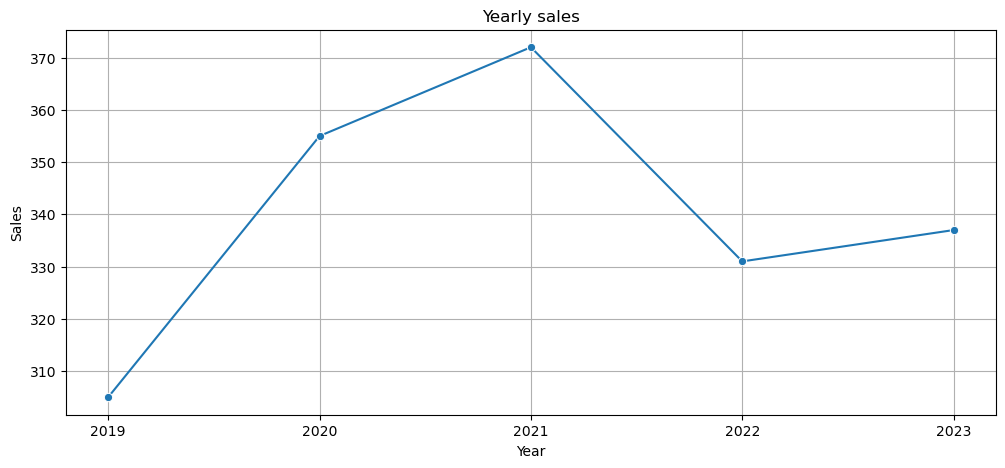

In [66]:
yealy_sales_count=[305, 355, 372, 331, 337]
years_list=['2019','2020','2021','2022','2023']
yealy_sales_df=pd.DataFrame({'Yearly Sales':yealy_sales_count,'Year':years_list})

plt.figure(figsize=(12, 5))
sns.lineplot(x=yealy_sales_df['Year'],y=yealy_sales_df['Yearly Sales'],marker='o')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Yearly sales')

**Sales Trends Over Time**

**Monthly Sales Trends:**

Sales decrease from January through February and March, but begin to increase steadily from April until August, reaching the second-highest point.
From August, sales gradually decrease until November, before peaking in December.

**Top-Selling Categories by Month:**

January and June: Fashion is the top-selling category.

February: Electronics are the most sold items.

March: Toys and Books are equally popular.

April and May: Books lead in sales.

July, August, September, and November: Home Appliances are the top-selling category.

October and December: Toys dominate sales.

**Weekly Sales Patterns:**

Sales are highest on Tuesdays and lowest on Mondays.

**Annual Sales Trends:**

Sales in 2021 were higher compared to other years.

In [67]:
#costumers based on age groups 

df['Age'].describe()

count    1700.000000
mean       44.605882
std        16.394165
min        18.000000
25%        31.000000
50%        44.000000
75%        59.000000
max        72.000000
Name: Age, dtype: float64

In [68]:
age=df['Age']
age_grp=pd.cut(age,bins=[18,28,39,50,61,72],right=True,include_lowest=True)

Text(0.5, 1.0, ' Age groups and number of costumers')

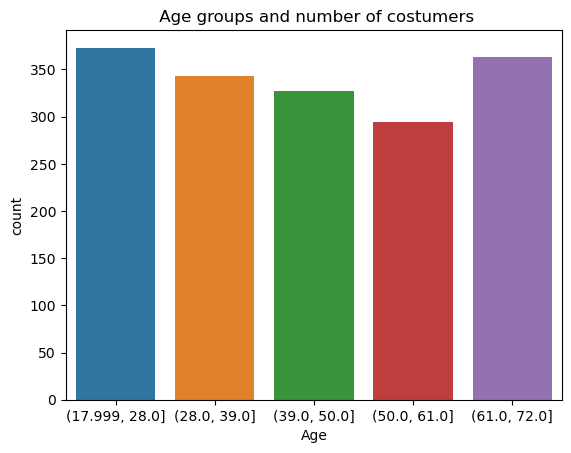

In [95]:
#plot to understand diff age groups and number of costumers in that group
sns.countplot(x=age_grp)
plt.title(' Age groups and number of costumers')

In [70]:
#grouping customers using age range
age_18_28=df.groupby('Age').filter(lambda x: x.name in range (18,29))
age_28_39=df.groupby('Age').filter(lambda x: x.name in range (28,40))
age_39_50=df.groupby('Age').filter(lambda x: 39<=x.name<=50)
age_50_61=df.groupby('Age').filter(lambda x: 50<=x.name<=61)
age_61_72=df[(df['Age']>=61) & (df['Age']<=72)]

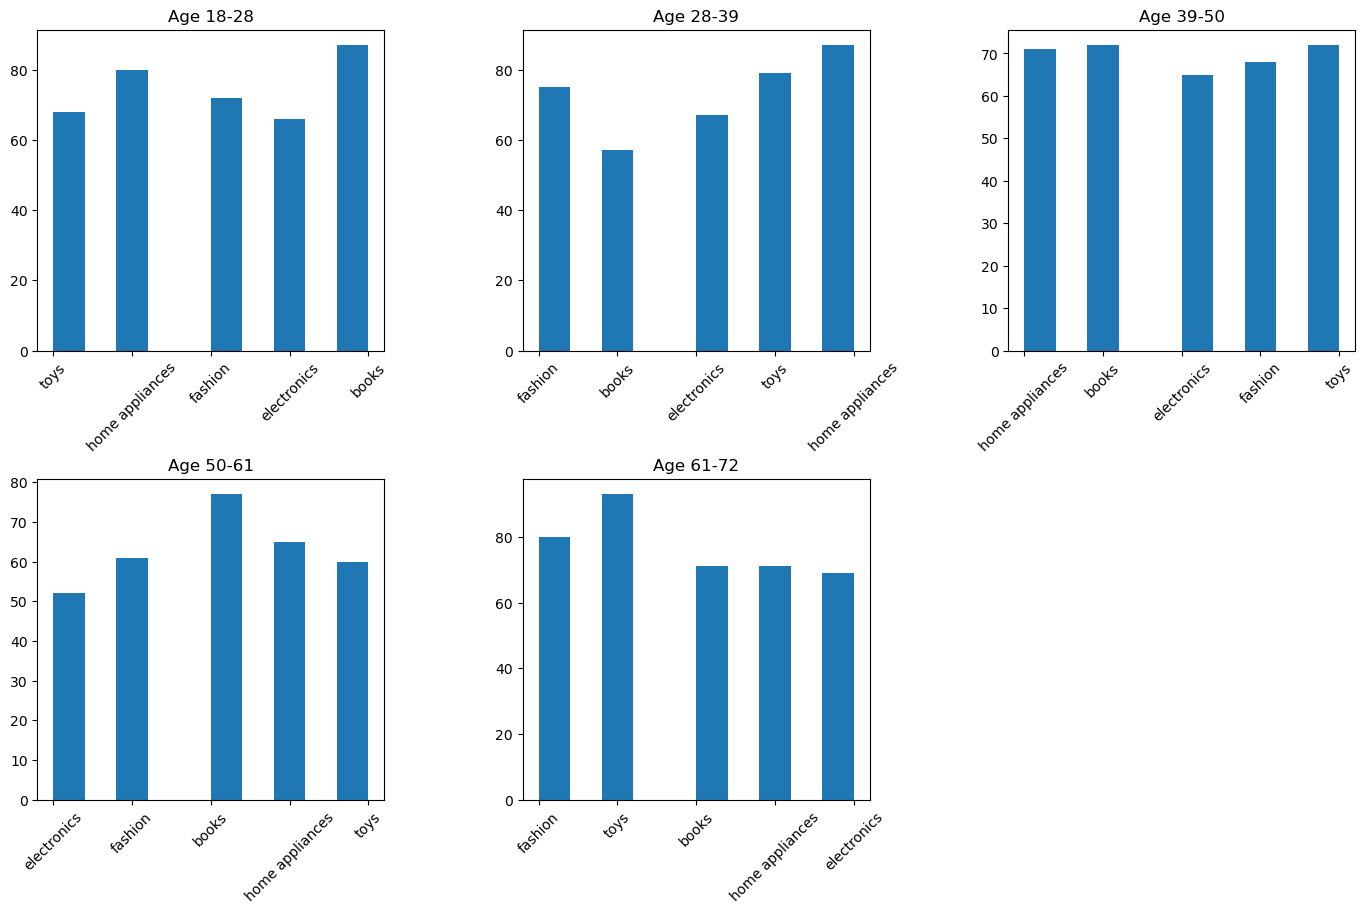

In [71]:
#plot to understand diff age groups and how the category of items brought vary on diff age groups

plt.figure(figsize=(17,10))
plt.subplots_adjust(hspace=0.4 ,wspace=0.4)

plt.subplot(231)
plt.hist(age_18_28['Category'])
plt.title('Age 18-28')
plt.xticks(rotation=45)

plt.subplot(232)
plt.hist(age_28_39['Category'])
plt.title('Age 28-39')
plt.xticks(rotation=45)

plt.subplot(233)
plt.hist(age_39_50['Category'])
plt.title('Age 39-50')
plt.xticks(rotation=45)

plt.subplot(234)
plt.hist(age_50_61['Category'])
plt.title('Age 50-61')
plt.xticks(rotation=45)

plt.subplot(235)
plt.hist(age_61_72['Category'])
plt.title('Age 61-72')
plt.xticks(rotation=45)
plt.show()

**Age-Based Purchase Patterns**

**Top Purchased Categories by Age Group:**

18–28: Most purchased category is Books.

28–39: Most purchased category is Home Appliances.

39–50: Most purchased categories are Books and Toys.

50–61: Books are the most purchased category.

61–72: Toys are the most purchased category.

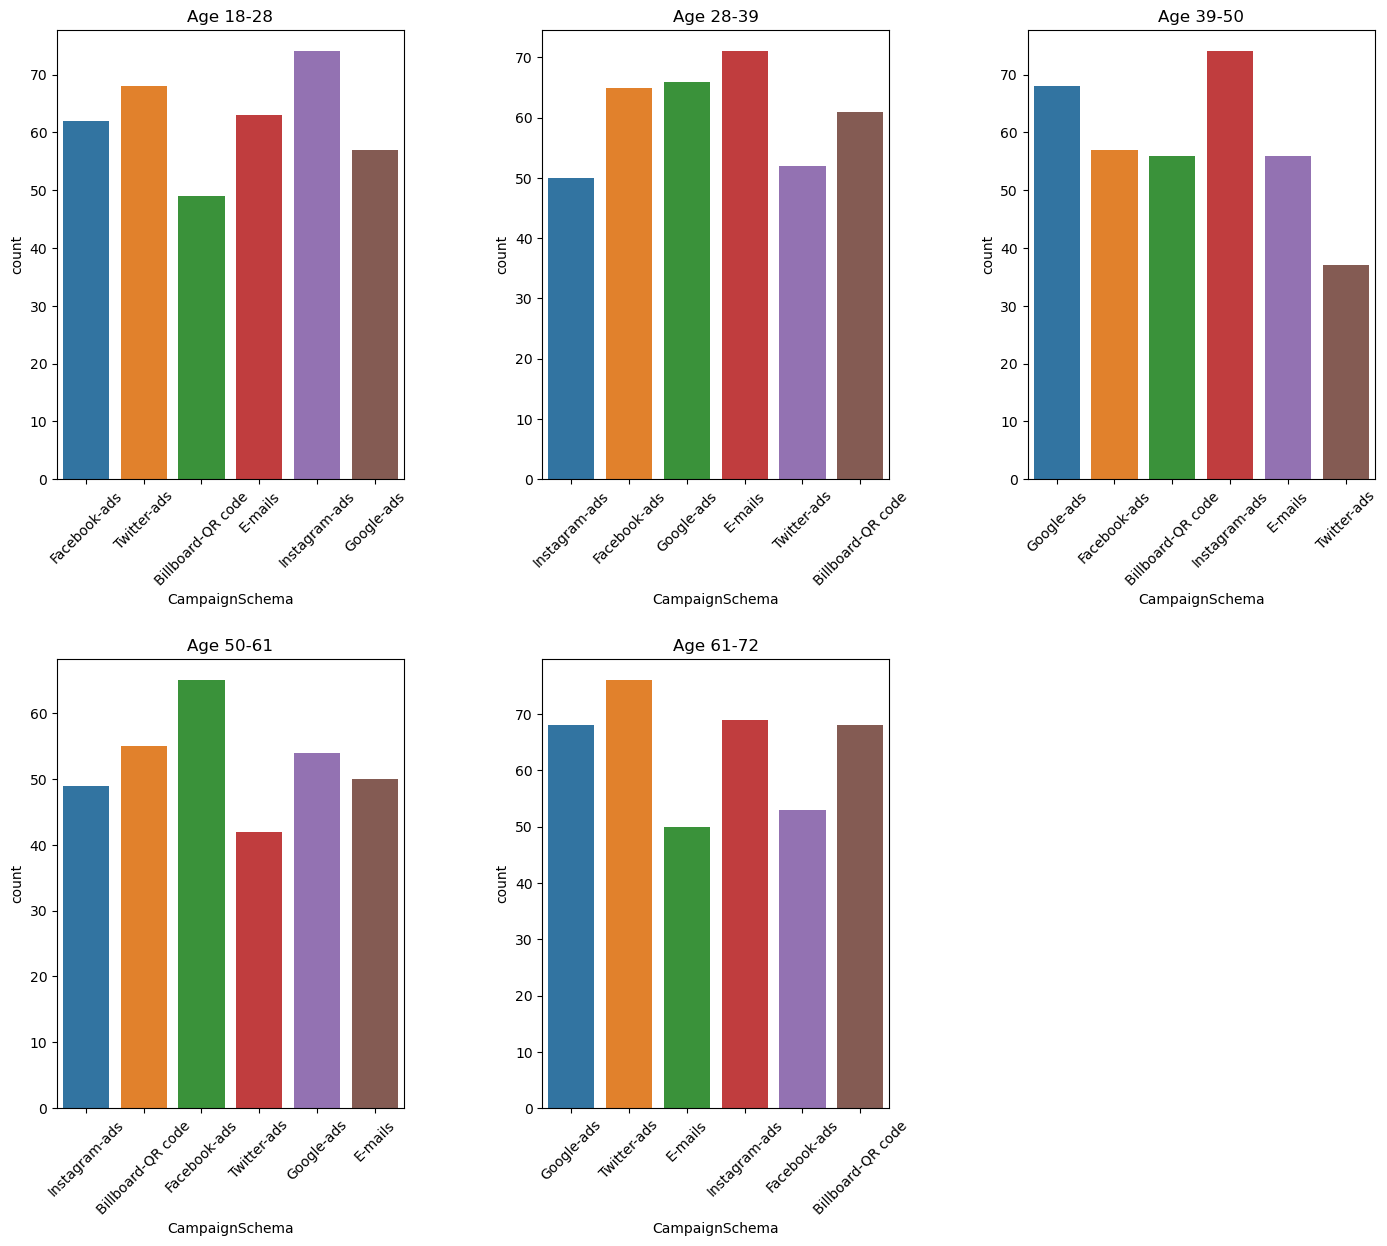

In [72]:
#plot to understand through which campaign schemas people from diff age groups came across the products

plt.figure(figsize=(17,14))
plt.subplots_adjust(hspace=0.4 ,wspace=0.4)

plt.subplot(231)
sns.countplot(x=age_18_28['CampaignSchema'])
plt.title('Age 18-28')
plt.xticks(rotation=45)

plt.subplot(232)
sns.countplot(x=age_28_39['CampaignSchema'])
plt.title('Age 28-39')
plt.xticks(rotation=45)

plt.subplot(233)
sns.countplot(x=age_39_50['CampaignSchema'])
plt.title('Age 39-50')
plt.xticks(rotation=45)

plt.subplot(234)
sns.countplot(x=age_50_61['CampaignSchema'])
plt.title('Age 50-61')
plt.xticks(rotation=45)

plt.subplot(235)
sns.countplot(x=age_61_72['CampaignSchema'])
plt.title('Age 61-72')
plt.xticks(rotation=45)
plt.show()  

Marketing Campaigns by Age Group

Preferred Marketing Channels by Age Group:

18–28: Most purchases are made via Instagram ads.

28–39: E-mails are the most effective channel for this age group.

39–50: Again, Instagram ads generate the most sales.

50–61: Most purchases are made through Facebook ads.

67–72: Twitter ads generate the most sales in this age group.

## Business Insights and Recommendations from Data Analysis

1. Customer Demographics & Behavior

**Age Distribution:**

The average customer age is 44, with most customers falling between the ages of 18 and 72.

50% of customers are below the age of 44, with older customers (50–72) showing a significant presence.

**Insight:** 

A broad age range is served, but targeting younger customers (18-28) with specific marketing campaigns may increase engagement. Similarly, 

continuing to serve the older segment with tailored offerings will help maintain their loyalty.

**Recommendation:**

Create age-segmented marketing campaigns to enhance relevance.

Focus on younger customers by offering trending products like electronics and fashion, while keeping books and toys prominent for older groups.

2. Credit Score & Monthly Income

**Credit Score Distribution:**

Most customers have credit scores around 690, indicating a healthy financial profile.

**Income Distribution:**

Monthly incomes vary widely from 3,000 to 8,000 units. Higher incomes seem to support purchases of more expensive products, but there’s no strict 

correlation between income and the value of purchases.

**Insight:**

Despite income levels, customers are still making high-value purchases, indicating that the products are appealing across income segments.

**Recommendation:**

Consider offering flexible payment plans (installments) for high-cost items like electronics to further encourage purchases across all income levels.

Premium offers can be targeted toward higher-income customers for higher-value items such as home appliances and electronics.

3. Purchase Patterns

**Quantity & Price:**

The average quantity of products purchased per transaction is 3.55. However, the majority of purchases are small items, with a few spikes for higher-cost 

products.

**Insight:**
Customers typically buy smaller or lower-priced products, but occasional high-value purchases happen across income levels.

**Recommendation:**

Offer product bundles to increase the quantity of items per purchase, especially for categories like toys and books.

Use targeted upselling techniques to promote premium products when customers show interest in lower-cost items.

4. Sales by Marketing Campaigns

**Top Channels:**

Instagram, Google, and Facebook ads generate the highest sales, while Twitter is less effective.

**Insight:** 
Social media is a key driver of sales, with Instagram being particularly effective among younger demographics, while emails work better for older groups 

(28–39).

**Recommendation:**

Invest more in Instagram and Google ads, especially for product categories that appeal to younger customers like fashion and electronics.

Optimize email marketing for older customers by promoting categories such as home appliances and books.

5. Geographical Distribution & International Customers

Top Markets: The largest share of customers comes from Canada (13.3%), followed by countries like China, India, and the UK. Japan accounts for the smallest 

share (9.7%).

**Insight:** 
North America and Asia dominate the customer base, while European countries show moderate engagement.

**Recommendation:**

Tailor campaigns specifically for the Canadian market, focusing on top-selling categories like home appliances and toys.

Develop localized marketing strategies for countries like Japan and Australia to boost engagement and customer retention.

6. Sales Trends Over Time & Seasonality

**Yearly Trends:** 

Sales tend to dip in early Q1 (February and March) and then rise from mid-Q2 until a peak in December.

**Insight:** 
The highest sales occur in December, likely driven by holiday shopping, while Q1 experiences slower performance.

**Recommendation:**

Plan major marketing and inventory efforts around mid-Q2 through Q4, leading into the December peak.

Use promotional discounts or special campaigns during Q1 to mitigate the sales dip in February and March.

7. Payment Methods

**Top Payment Methods:** 
Credit Cards are the most popular payment method, followed by Debit Cards and Cash on Delivery. Paypal is the least used.

**Insight:** 

Customers prefer quick, secure payment methods, with a substantial share choosing COD, indicating the importance of trust in the purchasing process.

**Recommendation:**
Promote the use of digital payment methods with special offers (e.g., discounts for credit or debit card use).

Ensure continued support for COD in regions where trust and security concerns are prevalent.

8. Product Categories & Pricing

**Top Categories:** 
Toys and Home Appliances dominate sales, while Electronics are priced the highest but have the lowest sales volume.

**Insight:** 
Price sensitivity seems to affect electronics, while lower-cost categories like toys and books attract the most sales.

**Recommendation:**

Offer seasonal discounts or bundles for electronics to make them more appealing to price-sensitive customers.

Capitalize on the popularity of toys and home appliances with limited-time offers and loyalty rewards programs to drive repeat purchases.

9. Order Returns

Return Rate: 13.9% of all orders are returned, with fashion products experiencing the highest return rates.

**Insight:** 

The fashion category has a higher-than-average return rate, which could indicate sizing or satisfaction issues.

**Recommendation:**

Improve product descriptions and sizing guides for fashion items to reduce returns.

Offer free returns for fashion items to improve customer satisfaction, while ensuring the return rate remains manageable.

10. Customer Session Durations

**Insight:**

941 customers spend more than 20 minutes on the platform, suggesting high engagement levels for the majority.

**Recommendation:**

Optimize the shopping experience for customers spending longer durations by offering personalized product recommendations after 10 minutes of browsing.

Introduce flash sales or discounts to drive conversions for customers who spend extended periods without completing purchases.

**Conclusion:**

The data reveals a balanced customer base across age and income, but with distinct preferences by segment. Social media and email marketing are critical, 

with Instagram leading sales conversions. Price-sensitive categories like toys and books perform well, but opportunities exist to boost high-value products 

like electronics. Optimizing sales during seasonal peaks and enhancing product detail for categories with high returns, such as fashion, will lead to 

better customer retention and sales growth.

**By focusing on customer preferences, improving product marketing, and leveraging seasonal trends, the business can optimize revenue and build stronger customer relationships.**






